# Project: Investigate a Dataset - [No-show-appointments]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
# Introduction

### Dataset Description 

> This dataset has over 100k medical appointments along with 14 variables. The dependent variable is the **No-show** column whereas the rest of the variables serve as the independent variables.The dataset helps explain why a given proportion of patients miss their appointments
It contains the following columns:
<ul>
    <li> PatientId </li>
            <ul>Identification of a patient</ul>
    <li> AppointmentId </li>
            <ul> Identification of each appointment</ul>
    <li> Gender </li>
    <ul> Basically whether the patient is a Male or a Female. Given by F and M as initials for Female and Male </ul>
    <li> ScheduledDay</li>
    <ul> This the day of appointment, that is when the patient should go and see the doctor</ul>
    <li>AppointmentDay</li>
    <ul>The day someone called and registered the appointement. This is definitely before the scheduled day</ul>
    <li>Age</li>
    <ul>How old is the patient. However some Age entries are 0 which are considered as baabies not born yet.</ul>
    <li>Neighbourhood</li>
    <ul>Where the appointment takes place</ul>
    <li>Scholarship</li>
    <ul>This shows the patients that are part of the scholarship. it has both 0 and 1 entries to mark whether True(1) or False(0)</ul>
    <li>Hipertension</li>
    <ul>This shows if a patient has high blood pressure or not. Aslo marked by 0(False) and 1(True)</ul>
    <li>Diabetes</li>
    <ul>If the patient suffers from diabetes or not.Marked as 0(False) or 1(True)</ul>
    <li>Alcoholism</li>
    <ul>If the patient is an alcoholic or not. Marked as 0(False) or 1(True)</ul>
    <li>Handcap</li>
    <ul>Each number corresponds to the total  number of conditions. However it is not clear if 0 stands for a certain condition or it means the patient is not handicapped</ul>
    <li>SMS_received</li>
    <ul>If the patient received 1 or more messages. Marked as 0(False) or 1(True)</ul>
    <li>No-show</li>
    <ul>This column depicts if the patient showed up or not. If the entry is Yes, it means the client didn't show up and vice versa</ul>
</ul>
                    
    
          



### Question(s) for Analysis 
<ul>1. What month and day of the week do most people book appointments </ul>
<ul>2. Which disease had the highest number of completed appointments?</ul>
<ul>3. What gender is highly likely to show up for appointments</ul>
<ul>4. What gender is highly likely to qualify for the scholarship</ul>
<ul>5. Which neighbourhood has more alcoholic patients</ul>

In [1]:
#import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline


<a id='wrangling'></a>
# Data Wrangling
> Here we are going to basically study the structure of our data and transform our raw data to a useable format. This will enable us to know how much of data cleaning we will need perform for our data to be ready of analysis


In [2]:
#load the dataset
df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [3]:
#summary statistics 
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [4]:
#check for data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [5]:
#check for missing vallues
df.isna().any().sum()

0

In [6]:
#check for duplicates
df.duplicated().sum()

0

In [7]:
#confirming number of rows and columns
df.shape

(110527, 14)

### quick observations from our dataset
 ><li>Age has a value of -1 which is impossible</li>
 <li>At least 50% of the patients are around 37 years and the oldest patient being at 155 years</li>
 <li>Handcap has values 0 to 4</li>
 <li>The data has no missing values</li>
 <li>The dataset has 110527 rows and 14 columns</li>
     <li>The appointmentday column is set at 00:00:00 time, which beats logic. This simply means all patients booked their         appointments before even the day started.</li>


## Data Cleaning
In this section we will fully concentrate on fixing any problems with our dataset. This will entail the following tasks:
<li>Drop columns that won't be needed in our analysis</li>
<li>Rename columns that are misspelt</li>
<li>Turn all column names to lowercase</li>
<li>Create a mask for the No-show column with reference to its logic and rename it</li>
<li>Convert date columns to datetime format</li>
<li>Drop the -1 value in the age column</li>
<li>Set the appointmentday time to end of day (23:59:59) to cater for all patients that booked for an appointment that day</li>

In [8]:
#drop columns that will not be of help in my analysis
df.drop(['Handcap','AppointmentID'],axis=1, inplace=True)
df.head()

,PatientId,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,SMS_received,No-show
0,2.987250e+13,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,No
1,5.589978e+14,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,No
2,4.262962e+12,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,No
3,8.679512e+11,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,No
4,8.841186e+12,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,No


In [9]:
#rename columns to lowercase
df.columns= df.columns.str.lower()

In [10]:
#rename misspelt column names
df.rename(columns = {'hipertension':'hypertension','no-show':'appointment'}, inplace=True)

In [11]:
#drop the -1 age value 
df.drop(df.index[df['age']==-1], inplace=True)

In [12]:
#check for unique entries in the column
df['appointment'].unique()

array(['No', 'Yes'], dtype=object)

In [13]:
#create a mask
df['appointment'] = df['appointment'].apply(lambda x: 1 if x=='No' else 0)

In [14]:
#check for the changes
df.head()

,patientid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,sms_received,appointment
0,2.987250e+13,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,1
1,5.589978e+14,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,1
2,4.262962e+12,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,1
3,8.679512e+11,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,1
4,8.841186e+12,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,1


In [15]:
#Convert the date times 
df['scheduledday'] = pd.to_datetime(df['scheduledday'], format= '%Y-%m-%dT%H:%M:%SZ')
df['appointmentday'] = pd.to_datetime(df['appointmentday'], format= '%Y-%m-%dT%H:%M:%SZ')

In [16]:
#check  for the changes
(df.scheduledday.head(),df.appointmentday.head())

(0   2016-04-29 18:38:08
 1   2016-04-29 16:08:27
 2   2016-04-29 16:19:04
 3   2016-04-29 17:29:31
 4   2016-04-29 16:07:23
 Name: scheduledday, dtype: datetime64[ns], 0   2016-04-29
 1   2016-04-29
 2   2016-04-29
 3   2016-04-29
 4   2016-04-29
 Name: appointmentday, dtype: datetime64[ns])

In [17]:
#move the appointmentday time to end of day
df['appointmentday'] = df['appointmentday']+pd.Timedelta('1d')-pd.Timedelta('1s')
df['appointmentday'].head()

0   2016-04-29 23:59:59
1   2016-04-29 23:59:59
2   2016-04-29 23:59:59
3   2016-04-29 23:59:59
4   2016-04-29 23:59:59
Name: appointmentday, dtype: datetime64[ns]

In [18]:
#get the day, week and year of both datetimes
df['scheduledday_week']  = df['scheduledday'].dt.weekday_name
df['scheduledday_month'] = df['scheduledday'].dt.month
df['scheduledday_year'] = df['scheduledday'].dt.year

df['appointmentday_week'] = df['appointmentday'].dt.weekday_name
df['appointmentday_month'] = df['appointmentday'].dt.month
df['appointmentday_year'] = df['appointmentday'].dt.year

In [19]:
#drop the scheduledday and appointmentday columns
df.drop(['scheduledday','appointmentday'],axis=1,inplace=True)

In [20]:
df.head()

,patientid,gender,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,sms_received,appointment,scheduledday_week,scheduledday_month,scheduledday_year,appointmentday_week,appointmentday_month,appointmentday_year
0,2.987250e+13,F,62,JARDIM DA PENHA,0,1,0,0,0,1,Friday,4,2016,Friday,4,2016
1,5.589978e+14,M,56,JARDIM DA PENHA,0,0,0,0,0,1,Friday,4,2016,Friday,4,2016
2,4.262962e+12,F,62,MATA DA PRAIA,0,0,0,0,0,1,Friday,4,2016,Friday,4,2016
3,8.679512e+11,F,8,PONTAL DE CAMBURI,0,0,0,0,0,1,Friday,4,2016,Friday,4,2016
4,8.841186e+12,F,56,JARDIM DA PENHA,0,1,1,0,0,1,Friday,4,2016,Friday,4,2016


#### general_data histogram

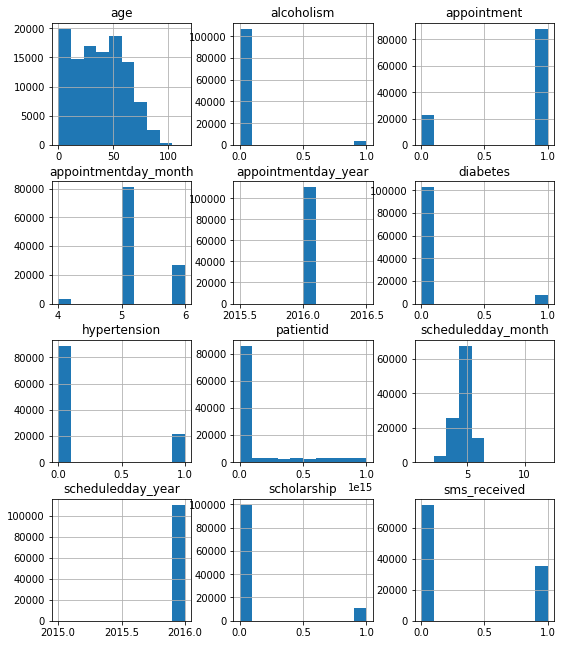

In [21]:
df.hist(figsize=(9,11)); 

Just by looking at the summary histogram, we can pick out a few things from our dataset:
> <li>Most of the appointments took place in the year 2016</li>
  <li>Most of the appointments happended in the 5th month of the year</li>
  <li>Most patients scheduled for their appointments in the year 2016</li>
  <li>Most of the patients are below 50 years</li>
  <li>Only A Small percentage of the patients are alcoholics</li>
  <li> Very few people in our dataset are part of the scholarship programme</li>

<a id='eda'></a>
# Exploratory Data Analysis
After cleaning the data here we compute statistics and ask the necessary questions to aid in studying of our dataset.


## 1. What month and day of the week do most people book appointments
By answering this question, one is able to choose a day with less appointments to avoid incedences of delay due to the high turn out

In [22]:
#day of the week with most appointments
df.groupby('appointmentday_week').size().idxmax()

'Wednesday'

appointmentday_week
Monday       22714.0
Tuesday      25640.0
Wednesday    25867.0
Thursday     17247.0
Friday       19019.0
Saturday        39.0
Sunday           NaN
dtype: float64

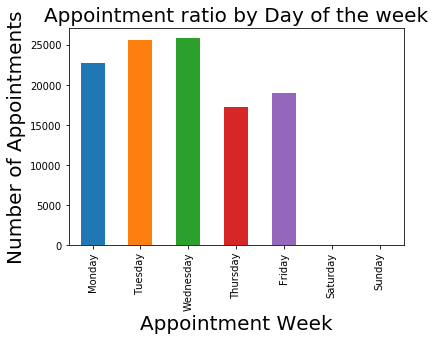

In [23]:
weekdays=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
df.groupby('appointmentday_week').size().reindex(weekdays).plot(kind='bar')

plt.title('Appointment ratio by Day of the week', fontsize=20)
plt.xlabel('Appointment Week', fontsize=20)
plt.ylabel('Number of Appointments', fontsize=20)

df.groupby(['appointmentday_week']).size().reindex(weekdays)

##### The chart depicts the number of appointments that were recorded in a given day of the week,overall. 
###### Wednesday had the highest number of appointments

In [24]:
#month of the year with the most appointments
df.groupby('appointmentday_month').size()

appointmentday_month
4     3235
5    80841
6    26450
dtype: int64

appointmentday_month
4     3235
5    80841
6    26450
dtype: int64

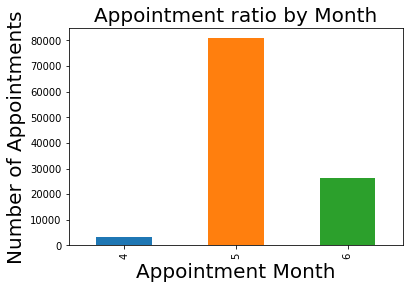

In [25]:
df.groupby('appointmentday_month').size().plot(kind='bar')

plt.title('Appointment ratio by Month', fontsize=20)
plt.xlabel('Appointment Month', fontsize=20)
plt.ylabel('Number of Appointments', fontsize=20)

df.groupby('appointmentday_month').size()

##### The chart depicts the number of appointments that were recorded in a given month of the year. 


### Wednesdays had the highest number of patients showing up for appointments and most of these appointments took place in MAY

## 2.Which of the diseases had the highest appointments? 
This question will help inform the hospital management, which is the most prevalent disease. Helps in planning and getting enough physicians for the given disease. The hospital is also able to advise the patients on best practices to lower the risk of contracting the disease.


In [26]:
#showed for patients that showed up, n_showed for patients that never showed up
showed = df.appointment == True
no_show = df.appointment== False


In [27]:
#mean of the people that showed up
showed_up = showed.mean()
showed_up

0.79806561352080052

In [28]:
#mean for the patients that never showed up
no_show = no_show.mean()
no_show

0.20193438647919945

Text(0,0.5,'The ratio')

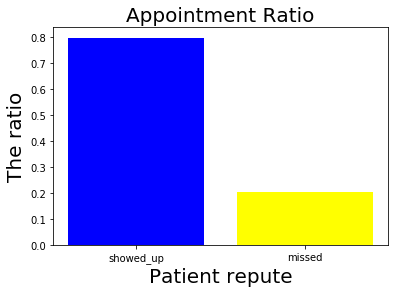

In [29]:
#plot the appointment ratio
colors = ['blue','yellow']
locations=[1,2]
heights = [showed_up,no_show]
labels = ['showed_up','missed']

plt.bar(locations, heights,tick_label=labels, color=colors)
plt.title('Appointment Ratio', fontsize=20)
plt.xlabel('Patient repute', fontsize=20)
plt.ylabel('The ratio',  fontsize=20)



##### The barplot depicts the ratio at which show up and miss appointments

### 20% of the patients miss appointments whereas 80% of the patients show up for the appointments

In [30]:
#Ratio of appointment by alcoholism
df.groupby(['alcoholism']).appointment.mean()

alcoholism
0    0.798052
1    0.798512
Name: appointment, dtype: float64

,appointment
alcoholism,
0,0.798052
1,0.798512


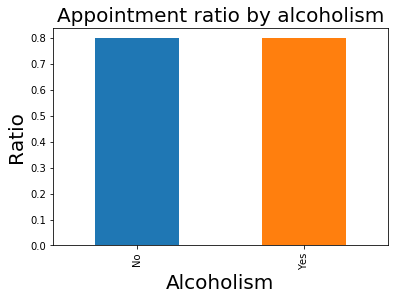

In [31]:
#plot the Appointment rati by alcoholism
df.groupby('alcoholism')['appointment'].mean().plot(kind='bar')

plt.xticks([0,1],['No','Yes'])
plt.title('Appointment ratio by alcoholism', fontsize=20)
plt.xlabel('Alcoholism', fontsize=20)
plt.ylabel('Ratio', fontsize=20);

df.groupby(['alcoholism'])[['appointment']].mean()

##### The plot depicts the rate at which Alcoholism affects the show up ratio

In [32]:
#ratio of appointment by diabetes
df.groupby(['diabetes']).appointment.mean()

diabetes
0    0.796370
1    0.819967
Name: appointment, dtype: float64

,appointment
diabetes,
0,0.796370
1,0.819967


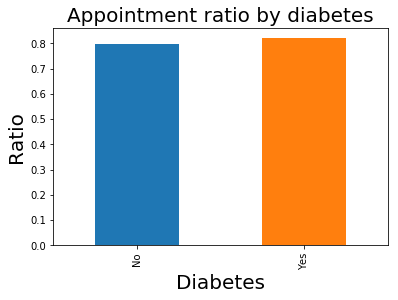

In [33]:
#plot appointment ratio by diabetes
df.groupby('diabetes')['appointment'].mean().plot(kind='bar')

plt.xticks([0,1],['No','Yes'])
plt.title('Appointment ratio by diabetes', fontsize=20)
plt.xlabel('Diabetes', fontsize=20)
plt.ylabel('Ratio', fontsize=20);

df.groupby(['diabetes'])[['appointment']].mean()

##### The plot depicts the rate at which Diabetes affects the show up ratio

In [34]:
#ratio of appointment by hypertension
df.groupby(['hypertension']).appointment.mean()

hypertension
0    0.790961
1    0.826980
Name: appointment, dtype: float64

,appointment
hypertension,
0,0.790961
1,0.826980


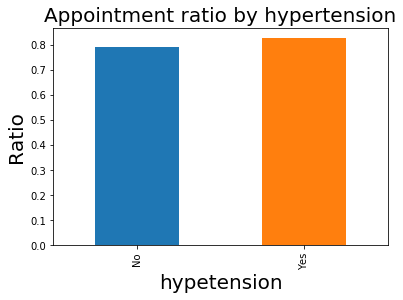

In [35]:
#plot Appointment ratio by hypertension
df.groupby('hypertension')['appointment'].mean().plot(kind='bar')

plt.xticks([0,1],['No','Yes'])
plt.title('Appointment ratio by hypertension', fontsize=20)
plt.xlabel('hypetension', fontsize=20)
plt.ylabel('Ratio', fontsize=20);

df.groupby(['hypertension'])[['appointment']].mean()

##### The plot depicts the rate at which Hypertension affects the show up ratio

### Hypertension has a higher show up rate compared to other diseases which is at a rate of *0.819* closely followed by **Diabetes** at a rate of *0.826*

## 3.What gender is highly likely to show up for appointment
In every research, studying the gender proportion helps in supporting the social relevance of the research. Hence we have to study gender proportion in our dataset

,patientid
gender,
F,71839
M,38687


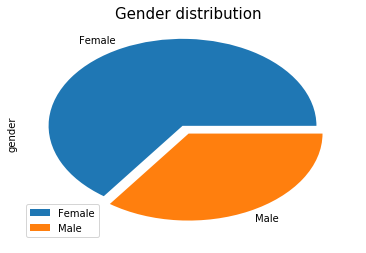

In [36]:
#gender distribution
myexplode = [0.1,0]
Labels = ['Female', 'Male']
df.gender.value_counts().plot(kind='pie', explode=myexplode, labels = Labels)
plt.title('Gender distribution', fontsize=(15));
plt.legend();

df.groupby(['gender'])[['patientid']].count()

##### The plot depicts the gender distribution in the dataset

In [37]:
#total number of females
df.gender.value_counts()[0].sum()

71839

In [38]:
#total number of males
df.gender.value_counts()[1].sum()

38687

In [39]:
#rate of appointment by gender
df.groupby('gender')['appointment'].mean()

gender
F    0.796851
M    0.800321
Name: appointment, dtype: float64

,appointment
gender,
F,0.796851
M,0.800321


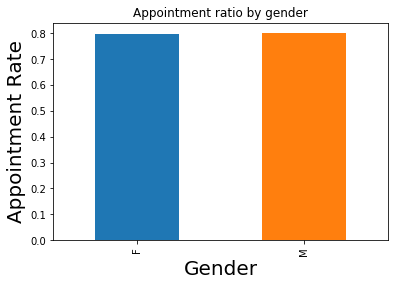

In [40]:
#visualize the plot
df.groupby('gender')['appointment'].mean().plot(kind='bar')
plt.ylabel('Appointment Rate', fontsize=20)
plt.xlabel('Gender', fontsize=20)
plt.title('Appointment ratio by gender')

df.groupby(['gender'])[['appointment']].mean()

##### The plot depicts the rate at which Gender affects the show up rate of patients

 ### Females and Males almost equally show up for appointments at a rate of 0.8 and 0.79 respectively

## 4.What gender is highly likely to qualify for the scholarship
Scholarships are sometimes gender-biased, some institutions offer scholarships for certain courses to a given gender. This question basically helps us to test for gender parity when it comes to scholarships

In [41]:
#rate of scholarship by gender
df.groupby(['gender'])[['scholarship']].mean()

,scholarship
gender,
F,0.123234
M,0.051904


,scholarship
gender,
F,0.123234
M,0.051904


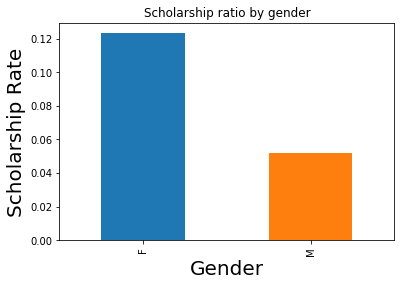

In [42]:
#visualize scholarship ratio by gender
df.groupby('gender')['scholarship'].mean().plot(kind='bar')
plt.ylabel('Scholarship Rate', fontsize=20)
plt.xlabel('Gender', fontsize=20)
plt.title('Scholarship ratio by gender');

df.groupby(['gender'])[['scholarship']].mean()

##### The plot depicts the scholarship rate in relation to gender

### Females are highly likely to qualify for the scholarship as compared to the males 

## 5.Which neighbourhood has more alcoholic patients
This study helps with knowing which condition is most prevalent in a given neighborhood. In this case we test for alcoholism.


In [43]:
neighbor = df.groupby(['neighbourhood'])[['alcoholism']].mean()
neighbor.head()

,alcoholism
neighbourhood,
AEROPORTO,0.000000
ANDORINHAS,0.022989
ANTÔNIO HONÓRIO,0.000000
ARIOVALDO FAVALESSA,0.049645
BARRO VERMELHO,0.004728


In [44]:
#Neighborhood with the highest number of alcoholics
idx = neighbor.idxmax()
idx

alcoholism    ESTRELINHA
dtype: object

In [45]:
neighbor.loc[idx]

,alcoholism
neighbourhood,
ESTRELINHA,0.14684


### ESTRELINHA has the highest number of alcoholics compared to other neighborhoods

## 6.Do sms increase the rate of appointment
This question helps us test the significance of this variable in this study.

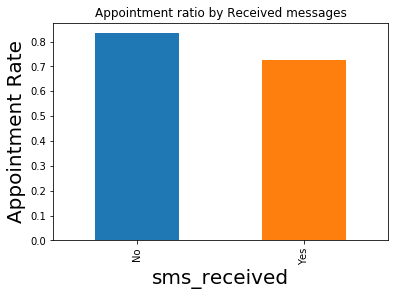

In [46]:
df.groupby('sms_received')['appointment'].mean().plot(kind='bar')
plt.xticks([0,1],['No','Yes'])
plt.ylabel('Appointment Rate', fontsize=20)
plt.xlabel('sms_received', fontsize=20)
plt.title('Appointment ratio by Received messages');

##### The plot depicts the rate at which Sms_received affects the show up ratio

### Recieving SMS messages does not affect the rate at which patients show up for appointments

<a id='conclusions'></a>
## Conclusions

**Findings**
> <li>Wednesdays had the highest number of people that showed up for appointments and most of these appointments took place in MAY(refer Q1)</li>
   <li>There are more female patients than Male(Reference Q3)</li>
  <li>Most of the patients showed up for appointments in the year 2016(Refer to the general_data histogram)</li>
  <li>Hypertension has a higher number of people that showed up for the appointment at a rate of 0.819 closely followed by Diabetes at a rate of 0.826(Refer Q2)</li>
  <li>Females and Males almost equally show up for appointments, hence gender does not affect the show up rate(Refer Q3)</li>
  <li>Females are highly likely to qualify for the scholarship(Refer Q4)</li>
  <li>Most of the patients are below 50 years(Refer general_data histogram)</li>
  <li>Recieving SMS messages does not affect the rate at which patients show up for appointments(Refer Q6)</li>
  <li>Only A Small percentage of the patients are alcoholics(Refer Q2)</li>
  <li>Very few people in our dataset are part of the scholarship programme(Refer general_data histogram)</li>
  <li>ESTRELINHA has the highest number of alcoholics(Refer Q5)</li>
  <li>Additional findings can be carried out on the Age variable to see which Age is affected mostly by a certain disease</li>
  
  
**Limitations**
> <li> The handicap variable had some misleading figures, one was not able to account if a patient was handicapped or not</li>
  <li>The dataset is insufficient, since it only shows entries for 3 months for a period of a whole year</li>


In [47]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0